In [1]:
# Time:      3/3/2021 10:01 PM
# Developer:    Jiahao Zhang



In [2]:
import numpy as np
import math
import networkx as nx
from matplotlib import pyplot as plt
import pickle


def structure_intersection(direction, exit_lane, entrance_lane, lane_width=3.5):
    '''
    This function determines the structure of a intersection by inputting above parameters.
    :param direction: <list>, for example, ['W', 'S', 'E'] denotes that the shape of this intersection is "T".
    :param exit_lane: <int>, it denotes how many lanes for vehicle exiting, it should be in range [2, inf)
    :param entrance_lane: <int>, it denotes how many lanes for vehicle entrancing, it should be in range [1, inf]
    :param lane_width: <float>, lane width, the default is 3.5m.
    :param delta: <float>, it denotes the boundary which is between exit and entrance lanes, shift the central
                line of the coordinate system.
    :return: <dict>, it is dictionary contains all the coordinate of exit and entrance points for each direction.
    '''

    '''Check all inputs'''
    if len(direction) <= 2:
        print('Hints: Please input the completed direction ')
        exit()
    if entrance_lane > exit_lane:
        print('Hints: The entrance lane should not be large the exit lane')
        exit()
    if exit_lane <= 2:
        print('Hints: The exit_lane should not be smaller than 2 ')
        exit()
    elif exit_lane - entrance_lane >= 3:
        print('Hints: The difference between "exit_lane" and "entrance_lane" should not be larger than 3 ')
        exit()

    ''' Construct the coordinate system of this intersection '''
    N_lanes = exit_lane + entrance_lane  # number of lanes for each direction
    [min_range, max_range] = [-0.5 * (N_lanes * lane_width), 0.5 * (N_lanes * lane_width)]  # the effective ranges

    ''' Main part:
        1) Calculate these points;
        2) And Put all above points into a dictionary "structure"
    '''
    center = 0.5 * N_lanes  # determine the middle line
    structure = {}  # set an empty dictionary

    # # _*_ Algorithm to find these coordinates of points _*_
    # # And put all these points into a dictionary "structure" '''
    for direct in direction:
        if direct == 'N':
            y = max_range  # the y-axis is determined
            # # determine the exit points
            N_out = {}
            for i in range(0, exit_lane):
                if i < center:
                    x = (i + 0.5) * lane_width + min_range  # calculate the x-coordinate
                    x = x - 0.5 * lane_width if entrance_lane == 1 else x  # give some offset to ensure "TH" is straight
                    N_out[str(i)] = [x, y]
                else:
                    x = (i - center + 0.5) * lane_width  # calculate the x-coordinate
                    x = x - 0.5 * lane_width if entrance_lane == 1 else x  # give some offset to ensure "TH" is straight
                    N_out[str(i)] = [x, y]

            structure['N_out'] = N_out  # # put above into the big dictionary

            # # determine the entrance points
            N_in = {}
            for i in range(0, entrance_lane):
                x = -(i + 0.5) * lane_width + max_range  # calculate the x-coordinate
                x = x - 0.5 * lane_width if entrance_lane == 1 else x  # give some offset to ensure "TH" is straight
                N_in[str(i)] = [x, y]

            structure['N_in'] = N_in  # # put above into the big dictionary

        elif direct == 'E':
            x = max_range  # the x-axis is determined
            # # determine the exit points
            E_out = {}
            for i in range(0, exit_lane):
                if i < center:
                    y = -(i + 0.5) * lane_width + max_range  # calculate the x-coordinate
                    y = y + 0.5 * lane_width if entrance_lane == 1 else y  # give some offset to ensure "TH" is straight
                    E_out[str(i)] = [x, y]
                else:
                    y = -(i - center + 0.5) * lane_width  # calculate the x-coordinate
                    y = y + 0.5 * lane_width if entrance_lane == 1 else y  # give some offset to ensure "TH" is straight
                    E_out[str(i)] = [x, y]

            structure['E_out'] = E_out  # # put above into the big dictionary

            # # determine the entrance points
            E_in = {}
            for i in range(0, entrance_lane):
                y = (i + 0.5) * lane_width + min_range  # calculate the x-coordinate
                y = y + 0.5 * lane_width if entrance_lane == 1 else y  # give some offset to ensure "TH" is straight
                E_in[str(i)] = [x, y]

            structure['E_in'] = E_in  # # put above into the big dictionary

        elif direct == 'S':
            y = min_range  # the y-axis is determined
            # # determine the exit points
            S_out = {}
            for i in range(0, exit_lane):
                if i < center:
                    x = -(i + 0.5) * lane_width + max_range  # calculate the x-coordinate
                    x = x + 0.5 * lane_width if entrance_lane == 1 else x  # give some offset to ensure "TH" is straight
                    S_out[str(i)] = [x, y]
                else:
                    x = -(i - center + 0.5) * lane_width  # calculate the x-coordinate
                    x = x + 0.5 * lane_width if entrance_lane == 1 else x  # give some offset to ensure "TH" is straight
                    S_out[str(i)] = [x, y]

            structure['S_out'] = S_out  # # put above into the big dictionary

            # # determine the entrance points
            S_in = {}
            for i in range(0, entrance_lane):
                x = (i + 0.5) * lane_width + min_range  # calculate the x-coordinate
                x = x + 0.5 * lane_width if entrance_lane == 1 else x  # give some offset to ensure "TH" is straight
                S_in[str(i)] = [x, y]

            structure['S_in'] = S_in  # # put above into the big dictionary

        elif direct == 'W':
            x = min_range  # the y-axis is determined
            # # determine the exit points
            W_out = {}
            for i in range(0, exit_lane):
                if i < center:
                    y = (i + 0.5) * lane_width + min_range  # calculate the x-coordinate
                    y = y - 0.5 * lane_width if entrance_lane == 1 else y  # give some offset to ensure "TH" is straight
                    W_out[str(i)] = [x, y]
                else:
                    y = (i - center + 0.5) * lane_width  # calculate the x-coordinate
                    y = y - 0.5 * lane_width if entrance_lane == 1 else y  # give some offset to ensure "TH" is straight
                    W_out[str(i)] = [x, y]

            structure['W_out'] = W_out  # # put above into the big dictionary

            # # determine the entrance points
            W_in = {}
            for i in range(0, entrance_lane):
                y = -(i + 0.5) * lane_width + max_range  # calculate the x-coordinate
                y = y - 0.5 * lane_width if entrance_lane == 1 else y  # give some offset to ensure "TH" is straight
                W_in[str(i)] = [x, y]

            structure['W_in'] = W_in  # # put above into the big dictionary

    return structure


def calc_segment(x, y):
    '''
    This function help to calculate the length of segments of these tracks
    based on two lists, which are 'X' and 'Y'.
    :param x: the all X elements for these track points
    :param y: the all Y elements for these track points
    :return: a list containing these segment length and total length for each track
    '''
    segment = []  # build a empty set for storing these segment length
    ''' Apply the circle to calculate each segment on the track'''
    for i in range(0, len(x) - 1):
        new_segment = math.sqrt(math.pow((x[i + 1] - x[i]), 2) + math.pow((y[i + 1] - y[i]), 2))
        segment.append(new_segment)

    total = sum(segment)  # calculate the total length
    segment = [float('{:.4f}'.format(i)) for i in segment]  # reset the number of decimal places
    total = format(total, '.4f')  # reset the number of decimal places

    return segment, total


def distance(x1, x2):
    '''
    This function helps to calculate the distance between two points
    :param x1: the coordinate of the first point, such as [p1,q1]
    :param x2: the coordinate of the second point, such as [p2,q2]
    :return: the distance between these two points
    '''
    p1 = np.array(x1)
    p2 = np.array(x2)
    p3 = p2 - p1
    return math.hypot(p3[0], p3[1])  # apply the "Euclidean norm"


def ellipse(x1, x2, exit_lane, entrance_lane, lane_width=3.5):
    '''
     This function generates the tracks of vehicle with ellipse function
    :param x1: The coordinate of the starting point, which vehicle leaves the lane, such as [p1,q1]
    :param x2: The coordinate of the ending point, which vehicle arrives the lane, such as [p2,q2]
    :param exit_lane: <int>, it denotes how many lanes for vehicle exiting.
    :param entrance_lane: <int>, it denotes how many lanes for vehicle entrancing.
    :param lane_width: <float>, lane width, the default is 3.5m
    :return: A list contains these coordinates of points and segments.

    :Algorithm: This function produces the coordinates of vehicle tracks, actually, it can be divided into 2 cases:
                (1) the straight tracks; (2) the curvilinear tracks

    '''

    def generate_xy(e_x, e_y, angle_star, angle_end, x1, x2, N):
        '''
        This function generate the 'X' and 'Y' for the curve tracks by the polar coordinates system
        :param e_x: The 'X' element for the center of circle
        :param e_y: The 'Y' element for the center of circle
        :param angle_star: The angle starting from
        :param angle_end: The angle ending
        :param x1: The coordinate of the vehicle leaves
        :param x2: The coordinate of the vehicle arrives
        :param N: The number of points, which is to generate
        :return: A list contains the generated 'X' and 'Y'
        '''
        a = abs(x1[0] - x2[0])  # calculate the long axis for the ellipse
        b = abs(x1[1] - x2[1])  # calculate the short axis for the ellipse
        angles_circle = np.linspace(angle_star, angle_end, N)
        e_angle = 0
        for angles in angles_circle:
            or_x = a * np.cos(angles)
            or_y = b * np.sin(angles)
            length_or = np.sqrt(or_x * or_x + or_y * or_y)
            or_theta = np.arctan2(or_y, or_x)
            new_theta = or_theta + e_angle / 180 * np.pi
            new_x = e_x + length_or * np.cos(new_theta)
            new_y = e_y + length_or * np.sin(new_theta)
            x.append(new_x)
            y.append(new_y)
        return x, y

    N = 30  # number of points
    x = []  # the empty set for storing the 'X' elements
    y = []  # the empty set for storing the 'Y' elements

    ''' Construct the coordinate system of this intersection '''
    N_lanes = exit_lane + entrance_lane  # number of lanes for each direction
    [min_range, max_range] = [-0.5 * (N_lanes * lane_width), 0.5 * (N_lanes * lane_width)]  # the effective ranges

    '''Eight types of tracks are discussed due to vehicle running directions'''

    # # Case 1: this is for [LT_N_W_1_3、LT_N_W_2_1、RT_W_N_0_0]
    if (x1[0] < x2[0] and x1[1] < x2[1] and x1[0] == min_range) or (
            x1[0] > x2[0] and x1[1] > x2[1] and x2[0] == min_range):
        e_x = min_range
        e_y = max_range
        angle_star = 1.5 * np.pi
        angle_end = 2 * np.pi
        x, y = generate_xy(e_x, e_y, angle_star, angle_end, x1, x2, N)

    # # Case 2: this is for [RT_S_W_0_0、LT_W_S_1_3、LT_W_S_2_1]
    elif (x1[0] < x2[0] and x1[1] > x2[1] and x1[0] == min_range) or (
            x1[0] > x2[0] and x1[1] < x2[1] and x2[0] == min_range):
        e_x = min_range
        e_y = min_range
        angle_star = 0 * np.pi
        angle_end = 0.5 * np.pi
        x, y = generate_xy(e_x, e_y, angle_star, angle_end, x1, x2, N)

    # # Case 3: this is for [RT_N_E_0_0、LT_E_N_2_1、RT_E_N_1_3]
    elif (x1[0] > x2[0] and x1[1] < x2[1] and x1[0] == max_range) or (
            x1[0] < x2[0] and x1[1] > x2[1] and x2[0] == max_range):
        e_x = max_range
        e_y = max_range
        angle_star = 1 * np.pi
        angle_end = 1.5 * np.pi
        x, y = generate_xy(e_x, e_y, angle_star, angle_end, x1, x2, N)

    # # Case 4: this is for [RT_E_S_0_0、LT_S_E_1_3、LT_S_E_2_1]
    elif (x1[0] < x2[0] and x1[1] < x2[1] and x2[0] == max_range) or (
            x1[0] > x2[0] and x1[1] > x2[1] and x1[0] == max_range):
        e_x = max_range
        e_y = min_range
        angle_star = 0.5 * np.pi
        angle_end = 1 * np.pi
        x, y = generate_xy(e_x, e_y, angle_star, angle_end, x1, x2, N)

    ''' This generates the straight track points  '''
    if x1[0] == x2[0]:
        x = np.array([x1[0]] * N)
        y = np.linspace(x1[1], x2[1], N)
    elif x1[1] == x2[1]:
        x = np.linspace(x1[0], x2[0], N)
        y = np.array([x1[1]] * N)

    segment = calc_segment(x, y)[0]  # the length of these segments for one vehicle track

    x = [float('{:.4f}'.format(i)) for i in x]  # reset 4 decimal places
    y = [float('{:.4f}'.format(i)) for i in y]  # reset 4 decimal places

    # plt.plot(x1[0], x1[1], 'o')
    # plt.plot(x2[0], x2[1], 'o')
    return x, y, segment


def Tracks(structure, direction, exit_lane, entrance_lane, lane_width=3.5, ):
    '''
    This function generate a dictionary which contains all these vehicle's tracks
    :param structure: the structure, which is obtained from previous defined function "structure_intersection"
    :param direction: <list>, for example, ['W', 'S', 'E'] denotes that the shape of this intersection is "T".
    :param exit_lane: <int>, it denotes how many lanes for vehicle exiting.
    :param lane_width: <float>, lane width, the default is 3.5m.

    :param entrance_lane_type: <list>, If the exit_lane is not larger than 3, the value is "None", or it is a specific
                              list, for example, ['LT', 'LT', 'TH', 'RT'] denotes 2 lanes for left-turning, 1 lane for
                              going straight and 1 lane for right-turning.

    :return: A dictionary contains X_track, Y_track.
            Format: {'Track_Name': [x1, x2, x3...], [y1, y2, y3...], }

    :Algorithm: Firstly, find the exit and entrance lanes by using the 'circulation'; Once the starting and ending
                points are determined, the previously defined 'ellipse' function is applied to generate these tracks
    '''

    ''' Get these position of exit or entrance lanes from previous defined structure'''
    lane_name = list(structure.keys())  # get these names for different lane-changes
    for name in lane_name:
        globals()[name] = structure[name]  # Assign dictionaries to variables

    ''' Set some basic parameters, such as 'direction', 'turning types' '''
    # # Firstly, construct the lane-change types
    type = {}
    # Case for 'cross intersection'
    if len(direction) == 4:
        type = {'LT': ['E_N', 'S_E', 'W_S', 'N_W'], 'TH': ['N_S', 'S_N', 'W_E', 'E_W'],
                'RT': ['N_E', 'S_W', 'W_N', 'E_S']}
    # Case for "T" type intersection
    elif len(direction) == 3:
        if 'N' not in direction:
            type = {'LT': ['S_E', 'W_S'], 'TH': ['W_E', 'E_W'], 'RT': ['S_W', 'E_S']}
        elif 'E' not in direction:
            type = {'LT': ['W_S', 'N_W'], 'TH': ['N_S', 'S_N'], 'RT': ['S_W', 'W_N']}
        elif 'S' not in direction:
            type = {'LT': ['E_N', 'N_W'], 'TH': ['W_E', 'E_W'], 'RT': ['N_E', 'W_N']}
        elif 'W' not in direction:
            type = {'LT': ['E_N', 'S_E'], 'TH': ['N_S', 'S_N'], 'RT': ['N_E', 'E_S']}

    # # Secondly, generate these tracks based on "circulation"
    TR_function = {}  # set an empty dictionary for storing these tracks

    ''' The main algorithm of generating these tracks '''
    for in_lane in direction:
        for out_lane in direction:
            temp = in_lane + '_' + out_lane  # the type of vehicle's turn direction
            In = eval(in_lane + '_in')  # the variable of In_lane
            Out = eval(out_lane + '_out')  # the variable of Out_lane
            int_part = exit_lane // 3  # the  integer part
            remainder = exit_lane % 3  # the remainder part

            # # # Three different lane-changing types # # #
            if temp in type['TH']:  # # # generate all 'Through' type
                # # this is for "T" type
                if len(direction) == 3:
                    name = 'TH_' + temp + '_0_0'  # the name of dictionary
                    TR_function[name] = ellipse(Out['0'], In['0'], exit_lane, entrance_lane, lane_width=3.5)
                # # this is for "十" type
                else:
                    if entrance_lane == 1:
                        name = 'TH_' + temp + '_0_1'  # the name of dictionary
                        TR_function[name] = ellipse(Out['1'], In['0'], exit_lane, entrance_lane, lane_width=3.5)
                    else:
                        for i in range(int_part, int_part + 1 * int_part + (remainder // 2)):
                            name = 'TH_' + temp + '_' + str(i) + '_' + str(i)  # the name of dictionary
                            TR_function[name] = ellipse(Out[str(i)], In[str(i)], exit_lane, entrance_lane,
                                                        lane_width=3.5)

            elif temp in type['RT']:  # # # generate all 'right-turn' type
                for i in range(0, int_part):
                    name = 'RT_' + temp + '_' + str(i) + '_' + str(i)  # the name of dictionary
                    TR_function[name] = ellipse(Out[str(i)], In[str(i)], exit_lane, entrance_lane, lane_width=3.5)

            elif temp in type['LT']:  # # # generate all 'Left-turn' type
                # # this is for "T" type
                if len(direction) == 3:
                    name = 'LT_' + temp + '_1_1'  # the name of dictionary
                    TR_function[name] = ellipse(Out['1'], In['1'], exit_lane, entrance_lane, lane_width=3.5)
                # # this is for "十" type
                else:
                    if entrance_lane == 1:
                        name_1 = 'LT_' + temp + '_0_2'  # the name of dictionary
                        TR_function[name_1] = ellipse(Out['2'], In['0'], exit_lane, entrance_lane, lane_width=3.5)
                    else:
                        entrance_lane_list = [k - 1 for k in range(entrance_lane, 0, -1)]
                        id = 0  # the initial index of entrance lane
                        for i in range(exit_lane - 1, exit_lane - (int_part + (1 if remainder > 0 else 0) + 1), -1):
                            j = int(entrance_lane_list[id])
                            name = 'LT_' + temp + '_' + str(j) + '_' + str(i)  # the name of dictionary
                            TR_function[name] = ellipse(Out[str(i)], In[str(j)], exit_lane, entrance_lane,
                                                        lane_width=3.5)
                            id += 1

    return TR_function


class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y


def check_intersect(p1, q1, p2, q2):
    '''
    This function help to check whether these two segments intersects based on four points
    :param p1: the start point of the first segment, such as [p1.x, p1.y]
    :param q1: the end point of the first segment, such as [q1.x, q1.y]
    :param p2: the start point of the first segment, such as [p2.x, p2.y]
    :param q2: the end point of the first segment, such as [q2.x, q2.y]

    :return: the boolean symbol, 'True' or 'False'
            # The main function that returns true if the line segment 'p1q1' and 'p2q2' intersect
    '''

    def on_Segment(p, q, r):

        if ((q.x <= max(p.x, r.x)) and (q.x >= min(p.x, r.x)) and
                (q.y <= max(p.y, r.y)) and (q.y >= min(p.y, r.y))):
            return True
        return False

    def orientation(p, q, r):
        # to find the orientation of an ordered triplet (p,q,r)
        # function returns the following values:
        # 0 : Colinear points
        # 1 : Clockwise points
        # 2 : Counterclockwise

        # See https://www.geeksforgeeks.org/orientation-3-ordered-points/amp/
        # for details of below formula.

        val = (float(q.y - p.y) * (r.x - q.x)) - (float(q.x - p.x) * (r.y - q.y))
        if (val > 0):
            return 1  # Clockwise orientation
        elif (val < 0):
            return 2  # Counterclockwise orientation
        else:
            return 0  # Co-linear orientation

    # The main function that returns true if the line segment 'p1q1' and 'p2q2' intersect.
    def doIntersect(p1, q1, p2, q2):
        # Find the 4 orientations required for the general and special cases
        o1 = orientation(p1, q1, p2)
        o2 = orientation(p1, q1, q2)
        o3 = orientation(p2, q2, p1)
        o4 = orientation(p2, q2, q1)
        # General case
        if ((o1 != o2) and (o3 != o4)):
            return True
        # Special Cases:
        # p1 , q1 and p2 are co-linear and p2 lies on segment p1q1
        if ((o1 == 0) and on_Segment(p1, p2, q1)):
            return True
        # p1 , q1 and q2 are co-linear and q2 lies on segment p1q1
        if ((o2 == 0) and on_Segment(p1, q2, q1)):
            return True
        # p2 , q2 and p1 are co-linear and p1 lies on segment p2q2
        if ((o3 == 0) and on_Segment(p2, p1, q2)):
            return True
        # p2 , q2 and q1 are co-linear and q1 lies on segment p2q2
        if ((o4 == 0) and on_Segment(p2, q1, q2)):
            return True
        return False

    return doIntersect(p1, q1, p2, q2)


def ConflictsPoints_TwoTracks(TR_function):
    '''
    This function helps to find conflict points of two vehicle tracks
    :param TR_function: the input variable is the previously obtained all vehicle tracks
    :return: A dictionary contains the coordinate of the their intersection
            Format, {'Track_Name_1':{'Track_Name_2':[x, y]},...}
    '''
    name_list = [key for key in TR_function if not key.startswith('__')]  # find all names of tracks

    ConflictsPoints = {}
    ConflictsPoints_TwoTracks = {}  # set a empty dictionary to store all conflict points among tracks

    for track_1 in name_list:  # the main loop to find all these intersection points

        inter_point = []  # # This list is used to store all conflict points between tracks_1 with all other tracks

        for track_2 in name_list:  # # choose the second track

            if track_1 != track_2:  # ensure these two tracks are not the same one
                x1 = TR_function[track_1][0]
                y1 = TR_function[track_1][1]
                x2 = TR_function[track_2][0]
                y2 = TR_function[track_2][1]

                ''' get the four points' coordinate of these two segments'''
                for i in range(0, len(x1) - 1):  # choose the first line segment
                    p1 = Point(x1[i], y1[i])
                    q1 = Point(x1[i + 1], y1[i + 1])
                    for j in range(0, len(x1) - 1):  # choose the second line segment
                        p2 = Point(x2[j], y2[j])
                        q2 = Point(x2[j + 1], y2[j + 1])

                        ''' judge whether they are crossed by previously defined function "check_intersect()" '''
                        if check_intersect(p1, q1, p2, q2) == True:  # find the intersection

                            """ Calculate the intersection """
                            # firstly, ensure these two segments intersect instead of connecting with one same point
                            if ((p1.x - q1.x) * (p2.y - q2.y) - (p1.y - q1.y) * (p2.x - q2.x)) == 0:  # ensure
                                continue
                            # calculate the coordinate of intersection, [px, py]
                            else:
                                px = ((p1.x * q1.y - p1.y * q1.x) * (p2.x - q2.x) - (p1.x - q1.x) * (
                                        p2.x * q2.y - p2.y * q2.x)) / (
                                             (p1.x - q1.x) * (p2.y - q2.y) - (p1.y - q1.y) * (p2.x - q2.x))
                                py = ((p1.x * q1.y - p1.y * q1.x) * (p2.y - q2.y) - (p1.y - q1.y) * (
                                        p2.x * q2.y - p2.y * q2.x)) / (
                                             (p1.x - q1.x) * (p2.y - q2.y) - (p1.y - q1.y) * (p2.x - q2.x))

                                px = format(px, '.4f')  # reset the decimal places
                                py = format(py, '.4f')  # reset the decimal places
                            inter_point_temp = [px, py]  # the coordinate of intersection

                            inter_point.append(inter_point_temp)
                            ConflictsPoints_TwoTracks.setdefault(track_1, {})[track_2] = inter_point_temp

        ConflictsPoints[track_1] = inter_point  # find all conflict points for "track_1"

    return ConflictsPoints_TwoTracks  # return a dictionary


def ConflictsPoints_list(TR_function):
    '''
    This function helps to all conflict points in each vehicle track with other tracks, for example, 'TH_S_N_1_1' with
    the rest of tracks. Actually, each value in the dictionary is a list.
    :param TR_function: the input variable is the previously obtained all vehicle tracks

    :return: A dictionary, and its values are lists containing coordinates of conflict points.
            Format, {'RT_N_E_0_0': [['8.7500', '10.5000']], 'TH_N_S_1_1': [['5.2500', '-6.8879'], ['5.2500', '-5.2500'], ... , ...}
    '''
    name_list = [key for key in TR_function if not key.startswith('__')]  # find all names of tracks
    ConflictsPoints = {}

    for track_1 in name_list:  # the main loop to find all these intersection points

        inter_point = []  # # # This list is used to store all conflict points between tracks_1 with all other tracks

        for track_2 in name_list:  # choose the second track
            if track_1 != track_2:  # ensure these two tracks are not the same one
                x1 = TR_function[track_1][0]
                y1 = TR_function[track_1][1]
                x2 = TR_function[track_2][0]
                y2 = TR_function[track_2][1]

                ''' get the four points' coordinate of these two segments'''
                for i in range(0, len(x1) - 1):  # choose the first line segment
                    p1 = Point(x1[i], y1[i])
                    q1 = Point(x1[i + 1], y1[i + 1])
                    for j in range(0, len(x1) - 1):  # choose the second line segment
                        p2 = Point(x2[j], y2[j])
                        q2 = Point(x2[j + 1], y2[j + 1])

                        ''' judge whether they are crossed by previously defined function "check_intersect()" '''
                        if check_intersect(p1, q1, p2, q2) == True:  # find the intersection

                            """ Calculate the intersection """
                            # firstly, ensure these two segments intersect instead of connecting with one same point
                            if ((p1.x - q1.x) * (p2.y - q2.y) - (p1.y - q1.y) * (p2.x - q2.x)) == 0:  # ensure
                                continue
                            # calculate the coordinate of intersection, [px, py]
                            else:
                                px = ((p1.x * q1.y - p1.y * q1.x) * (p2.x - q2.x) - (p1.x - q1.x) * (
                                        p2.x * q2.y - p2.y * q2.x)) / (
                                             (p1.x - q1.x) * (p2.y - q2.y) - (p1.y - q1.y) * (p2.x - q2.x))
                                py = ((p1.x * q1.y - p1.y * q1.x) * (p2.y - q2.y) - (p1.y - q1.y) * (
                                        p2.x * q2.y - p2.y * q2.x)) / (
                                             (p1.x - q1.x) * (p2.y - q2.y) - (p1.y - q1.y) * (p2.x - q2.x))

                                px = format(px, '.4f')  # reset the decimal places
                                py = format(py, '.4f')  # reset the decimal places
                            inter_point_temp = [px, py]  # the coordinate of intersection
                            inter_point.append(inter_point_temp)

        ''' sort these points based on running direction because these found points are disorder '''

        def sort_point(track_1, inter_point):
            '''
            Sort these conflict points based on running direction because these found points are disorder
            :param track_1: all conflict points in temporary track_1, which is not completed
            :param inter_point: the newly found points

            :return: a order list contain these conflict points based on vehicle running direction
            :Algorithm: the core of the function is determining the order by comparing the magnitude of  "X" or "Y"
                    elements for these conflict points
            '''
            X = []
            Y = []
            temp = []
            for item in inter_point:
                X.append(float(item[0]))
                Y.append(float(item[1]))
            X = np.array(X)
            Y = np.array(Y)

            ''' 
                The core algorithm of this function:
                the element in 'track_1[3]' is vehicle's arriving lane, for example "RT_N_E_0_0", then these 'X' or 'Y'
                can be compared. 
            '''
            if track_1[3] == 'E':
                for idx in np.argsort(X):
                    temp.append(inter_point[idx])
            elif track_1[3] == 'W':
                for idx in np.argsort(-X):
                    temp.append(inter_point[idx])
            if track_1[3] == 'N':
                for idx in np.argsort(Y):
                    temp.append(inter_point[idx])
            elif track_1[3] == 'S':
                for idx in np.argsort(-Y):
                    temp.append(inter_point[idx])
            return temp

        ConflictsPoints[track_1] = sort_point(track_1, inter_point)

    return ConflictsPoints


def get_keys(d, value):
    '''
    Get the key based on its corresponding values
    :param d: Input a dictionary that you want to the keys
    :param value: the values of the corresponding key
    :return: the correspondsing keys
    '''
    return [k for k, v in d.items() if v == value]


def vector_angle(vector):
    '''
    This function helps to calculate the angle. Firstly, convect the given vector into unit vector, then calculate
    the angel based the (cosα, sinα).
    :param vector: the given vector
    :return: the angel, "α"
    '''

    ''' Convect it into unit vector'''
    vector_unit = [vector[0] / math.hypot(vector[0], vector[1]), vector[1] / math.hypot(vector[0], vector[1])]

    '''Calculate the angle '''
    angle_acos = math.acos(vector_unit[0])
    angle_asin = math.asin(vector_unit[1])
    angle = 0
    if format(math.sin(angle_acos), '.4f') == format(vector_unit[1], '.4f'):
        angle = math.degrees(angle_acos)

    elif format(math.cos(angle_asin), '.4f') == format(vector_unit[0], '.4f'):
        angle = math.degrees(angle_asin)

    return angle


def find_Cycles(TR_function, direction, exit_lane, entrance_lane, lane_width=3.5):
    '''
    This function help to find all nodes and edges in the intersection network, and plot
    the conflict network
    :param TR_function: the input variable is the previously obtained all vehicle tracks
    :param exit_lane: <int>, it denotes how many lanes for vehicle exiting, it should be in range [0.6 * lane_width, inf)
    :param entrance_lane: <int>, it denotes how many lanes for vehicle entrancing, it should be in range [1, inf]
    :param lane_width: <float>, lane width, the default is 3.5m.

    :return:
            four parts such as 'Cycles', 'somecycle', 'nodes' and 'edges', their detailed info is depicted following:
            "nodes": A dictionary, for example, {'node_1':[x1, y1], 'node_2':[x2, y2], ... ,}
            "edges": A dictionary, for example, {'edge_1':(node_1, node_2), 'edge_2':(node_2, node_3), ... ,}
    '''

    ''' Algorithm to get these directional edges '''
    conflict_track = ConflictsPoints_list(TR_function)  # the dictionary contains all each track conflict-points
    name_conflict = [key for key in conflict_track if not key.startswith('__')]  # all names of tracks

    i = 0  # the first key for the first node(these nodes do not contain repeated elements)
    j = 0  # the first key for the first edge
    count = 0  # the first key for the first temp_nodes's node (these nodes do not contain repeated elements)
    nodes = {}
    edges = {}
    temp_nodes = {}  # the temporary dictionary store the nodes which may appear twice
    ''' Algorithm to get nodes and edges for the network'''
    for name in name_conflict:
        ''' construct nodes with coordinates '''
        for item in conflict_track[name]:
            temp_node = [float(item[0]), float(item[1])]
            if temp_node not in nodes.values():
                nodes[i] = [float(item[0]), float(item[1])]
                i += 1

            ''' the temporary nodes'''
            temp_nodes[count] = temp_node
            count += 1

        ''' construct these directed edges'''
        for k in range(j, count):
            if count - j > 1:  # the edges must have at least two nodes
                if temp_nodes[k] in nodes.values():
                    idx_1 = list(nodes.keys())[list(nodes.values()).index(temp_nodes[k])]
                    idx_2 = list(nodes.keys())[list(nodes.values()).index(temp_nodes[k + 1])]
                edges[j] = (idx_1, idx_2)
            j += 1

    ''' Add some starting/ending nodes because these nodes do not belong to conflict points '''

    structure = structure_intersection(direction, exit_lane, entrance_lane, lane_width=3.5)
    for item in list(structure.values()):
        for n in range(0, len(item)):
            node_add = list(item.values())[n]
            if node_add not in list(nodes.values()):
                nodes[len(nodes)] = node_add

    ''' The algorithm to add new edges'''
    for i in list(nodes.keys()):
        edges_start_node = [edge[0] for edge in list(edges.values())]  # find all start nodes for the edges
        edges_end_node = [edge[1] for edge in list(edges.values())]  # find all end nodes for the edges
        if (i not in edges_start_node) and (i not in edges_end_node):  # find the newly added node

            track_name = [key for key in TR_function if not key.startswith('__')]  # find all names of tracks
            for track in track_name:
                X = TR_function[track][0]  # get all X-axis
                Y = TR_function[track][1]  # get all Y-axis
                Points = [[X[k], Y[k]] for k in range(0, len(X))]  # get all points

                if nodes[i] in Points:  # determine which track the node is in
                    if len(conflict_track[track]) == 0:  # # this is for "RT" type
                        for point in Points:
                            if point in list(nodes.values()) and point != nodes[i]:
                                vector_1 = nodes[i]  # the first vector
                                vector_2 = point  # the second vector
                                if vector_angle(vector_1) < vector_angle(vector_2):
                                    edges[list(edges.keys())[-1] + 1] = (
                                    get_keys(nodes, vector_1)[0], get_keys(nodes, vector_2)[0])
                                else:
                                    edges[list(edges.keys())[-1] + 1] = (
                                    get_keys(nodes, vector_2)[0], get_keys(nodes, vector_1)[0])

                    else:  # # this is for "TH" and "LT" type
                        all_points = [[float(point[0]), float(point[1])] for point in
                                      conflict_track[track]]  # conflict points
                        all_distance = [distance(nodes[i], point) for point in all_points]  # compute these distances
                        idx = all_distance.index(min(all_distance))  # the index of minimum distance
                        edges[list(edges.keys())[-1] + 1] = (
                            get_keys(nodes, nodes[i])[0], get_keys(nodes, all_points[idx])[0])

    ''' Plot the network '''
    G = nx.DiGraph(list(edges.values()))  # create a directed graph
    G.add_nodes_from(list(nodes.keys()))  # add nodes
    vnode = np.array(list(nodes.values()))  # add the coordinates
    npos = dict(zip(list(nodes.keys()), vnode))  # connect the nodes with coordinates
    nx.draw_networkx_nodes(G, npos, node_size=80, node_color="#6CB6FF")  # plot the nodes
    nx.draw_networkx_edges(G, npos, list(edges.values()))  # plot the edges
    ''' label these nodes'''
    labels = {}
    for node, _ in G.nodes(data="False"):
        labels[node] = node
    nx.draw_networkx_labels(G, vnode, labels, font_size=10)
    plt.show()

    return nodes, edges


def find_loops(TR_function, direction, nodes, edges, exit_lane, entrance_lane, lane_width=3.5, N=10):
    '''
    This function helps to find the nodes and edges with specific labels instead of the number. Furthermore, it
    find all loops and the corresponding segments, which is composed with some coordinates of points
    :param TR_function: the input variable is the previously obtained all vehicle tracks
    :param nodes: <dict>, it the nodes which are got from previously defined function "find_Cycles"
    :param edges: <dict>, it the edges which are got from previously defined function "find_Cycles"
    :param exit_lane: <int>, it denotes how many lanes for vehicle exiting, it should be in range [2, inf)
    :param entrance_lane: <int>, it denotes how many lanes for vehicle entrancing, it should be in range [1, inf]
    :param lane_width: <float>, lane width, the default is 3.5m.

    @ N: the number of points in each segments for the found loop except the start of end nodes

    :return:
        four parts such as 'Cycles', 'somecycle', 'nodes_new' and 'edges_new', their detailed info is
        depicted following:
        "nodes_new": A dictionary, for example, {'TH_N_S_1_1@TH_N_S_1_1':[x1, y1], 'LT_W_S_0_2@TH_N_S_1_1':[x2, y2],}
        "edges_new": A dictionary, for example, {'edge_1':(TH_N_S_1_1@TH_N_S_1_1, LT_W_S_0_2@TH_N_S_1_1),...}
        "Cycles": A list contains all loops, for example, [[nodes_1, nodes_2, nodes_3, ...], ...}
        "somecycle": A dictionary, for example, {'loop_1':[[x1,y1], [x2,y2], ...], 'loop_2':[[x1,y1], [x2,y2], ...]}
    '''

    ''' get the basic information: ConflictsPoints_list and conflict points '''
    Tracks_Lists = ConflictsPoints_list(TR_function)  # the all conflict point among track
    # # _*_ find all conflict points _*_
    name_list = [key for key in Tracks_Lists if not key.startswith('__')]  # find all names of tracks
    conflict_points = []    # set an empty list for storing all conflict points
    for name in name_list:
        for i in range(0, len(Tracks_Lists[name])):
            conflict_points.append([float(Tracks_Lists[name][i][0]), float(Tracks_Lists[name][i][1])])

    ''' get all start points' coordinates '''
    node_start_list = []
    structure = structure_intersection(direction, exit_lane, entrance_lane, lane_width=3.5)
    for item in list(structure.values()):
        for dict in list(item.values()):
            node_start_list.append(dict)

    ''' Algorithm to replace these labels for nodes '''
    nodes_new = {}  # set a new dictionary whose keys are not numbers
    for id in nodes:
        # # Case 1: the node belongs to the intersection of two tracks
        node = [str(format(nodes[id][0], '.4f')), str(format(nodes[id][1], '.4f'))]  # reset the format
        # name_list = [key for key in Tracks_Lists if not key.startswith('__')]  # find all names of tracks
        temp_name = [item for item in name_list if node in Tracks_Lists[item]]  # whether cross point or not
        if len(temp_name) > 1:
            node_id = temp_name[0] + '@' + temp_name[1]  # set the new label for the node
            nodes_new[str(node_id)] = nodes[id]

        # # Case 2: the node belongs to the start point
        else:
            track_name = [key for key in TR_function if not key.startswith('__')]  # find all names of tracks
            for track in track_name:
                X = TR_function[track][0]  # get all X-axis
                Y = TR_function[track][1]  # get all Y-axis
                Points = [[X[k], Y[k]] for k in range(0, len(X))]  # get all points

                if nodes[id] in Points:  # determine which track the node is in
                    if Points.index(nodes[id]) == 0:  # the position where the node is
                        if Points[-1] in conflict_points:
                            nodes_new[str(track)] = nodes[id]
                        else:
                            nodes_new[str(track) + '_b'] = nodes[id]

                    else:
                        if Points[0] in conflict_points:
                            nodes_new[str(track)] = nodes[id]
                        else:
                            nodes_new[str(track) + '_a'] = nodes[id]

    ''' Algorithm to replace these labels for edges '''
    edges_new = {}  # set a new dictionary whose keys are not numbers
    edges_length = {}  # set a new dictionary to store the length of these edges
    i = 0
    for link in list(edges.values()):
        node_start = link[0]  # the start node for the the directed link
        node_end = link[1]  # the end node for the the directed link
        '''Add new edges '''
        new_link = (get_keys(nodes_new, nodes[node_start]), get_keys(nodes_new, nodes[node_end]))  # the new edge
        edges_new[i] = (new_link[0][0], new_link[1][0])

        ''' Calculate the length'''
        length = distance(nodes[node_start], nodes[node_end])
        edges_length[i] = length
        i += 1

    ''' Find all these cycles'''
    G = nx.DiGraph(list(edges_new.values()))  # create a directed graph
    all_cycles = nx.recursive_simple_cycles(G)  # find all these cycles, which include self-cycles

    '''Find all cycles and their segments '''
    Cycles = []
    somecycle = {}
    Threshold_length = 20  # set thresholds

    ''' the Algorithm to find these loops '''
    for loop in all_cycles:
        if len(loop) > 1:  # # ensure these loops have at least two nodes
            length = []
            segment = []
            points = []  # there are some points in each segment
            for i in range(0, len(loop)):
                if i < len(loop) - 1:
                    length.append(distance(nodes_new[loop[i]], nodes_new[loop[i + 1]]))  # length of a segment

                    ''' Generate some middle points with number 'N' '''
                    x = np.linspace(nodes_new[loop[i]][0], nodes_new[loop[i + 1]][0], N)
                    y = np.linspace(nodes_new[loop[i]][1], nodes_new[loop[i + 1]][1], N)
                    segment_points = [nodes_new[loop[i]]]
                    for k in range(0, N):
                        segment_points.append([format(x[k], '.4f'), format(y[k], '.4f')])
                    segment_points.append(nodes_new[loop[i + 1]])

                    segment.append([loop[i], loop[i + 1]])
                    points.append(segment_points)
                else:
                    length.append(distance(nodes_new[loop[i]], nodes_new[loop[0]]))
                    ''' Generate some middle points with number 'N' '''
                    x = np.linspace(nodes_new[loop[i]][0], nodes_new[loop[0]][0], N)
                    y = np.linspace(nodes_new[loop[i]][1], nodes_new[loop[0]][1], N)
                    segment_points = [nodes_new[loop[i]]]
                    for k in range(0, N):
                        segment_points.append([format(x[k], '.4f'), format(y[k], '.4f')])
                    segment_points.append(nodes_new[loop[0]])

                    segment.append([loop[i], loop[0]])  # count the segments
                    points.append(segment_points)

                if sum(length) > Threshold_length:
                    Cycles.append(loop)  # find all these loop
                    somecycle[str(loop)] = points

    return nodes_new, edges_new, Cycles, somecycle


def DrawLoop(TR_function, Loop, somecycle, method, exit_lane, entrance_lane, lane_width=3.5):
    '''
    There two methods helping to draw the loop based on the given loop
    :param TR_function: the input variable is the previously obtained all vehicle tracks
    :param Loop: It is a list containing these nodes in give loop
    :param somecycle: Input a dictionary, which contains all these segments

    :param method:
        if "method = 1", it plot the loop with all tracks
        if "method = 2", it only plot the loop without tracks

    :param exit_lane: <int>, it denotes how many lanes for vehicle exiting.
    :param entrance_lane: <int>, it denotes how many lanes for vehicle entrancing.
    :param lane_width: <float>, lane width, the default is 3.5m
    :return: Nothing

    '''
    if method == 1:
        # # Method 1: plot the loop with all tracks
        dlist = [key for key in TR_function if not key.startswith('__')]
        for item in dlist:
            plt.plot(TR_function[item][0], TR_function[item][1])  # plot all these tracks

        ''' Find all these coordinates of conflict points in the loop'''
        for item in somecycle[str(Loop)]:
            x = [float(ii[0]) for ii in item]
            y = [float(ii[1]) for ii in item]
            plt.plot(x, y, color='k', linestyle='-', linewidth=3)

    else:
        # # Method 2: Draw the graph based on points
        for item in somecycle[str(Loop)]:
            x = [float(ii[0]) for ii in item]
            y = [float(ii[1]) for ii in item]
            plt.plot(x, y, color='k', linestyle='-', linewidth=3)

    ''' Calculate the range of this intersection '''
    N_lanes = exit_lane + entrance_lane  # number of lanes for each direction
    [min_range, max_range] = [-0.5 * (N_lanes * lane_width), 0.5 * (N_lanes * lane_width)]  # the effective ranges
    plt.xlim(min_range, max_range)
    plt.ylim(min_range, max_range)
    plt.show()




Main Command:

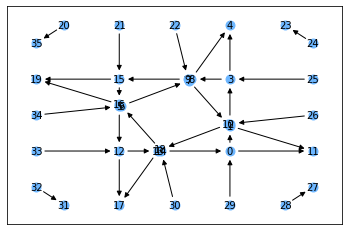

{':TH_N_S_1_1': ((3.5, -3.5), (3.5, -1.0477), (3.5, -0.8464), (3.5, 3.5), (3.5, 8.75)), ':LT_N_W_1_2': ((-3.5, 0.8464), (-3.3603, 0.8959), (0.8959, 3.3603), (1.0477, 3.5), (3.5, 8.75)), ':LT_E_N_1_2': ((0.8464, 3.5), (0.8959, 3.3603), (3.3603, -0.8959), (3.5, -1.0477), (8.75, -3.5)), ':TH_E_W_1_1': ((-3.5, -3.5), (-1.0477, -3.5), (-0.8464, -3.5), (3.5, -3.5), (8.75, -3.5)), ':TH_S_N_1_1': ((-3.5, 3.5), (-3.5, 1.0477), (-3.5, 0.8464), (-3.5, -3.5), (-3.5, -8.75)), ':LT_S_E_1_2': ((3.5, -0.8464), (3.3603, -0.8959), (-0.8959, -3.3603), (-1.0477, -3.5), (-3.5, -8.75)), ':TH_W_E_1_1': ((3.5, 3.5), (1.0477, 3.5), (0.8464, 3.5), (-3.5, 3.5), (-8.75, 3.5)), ':LT_W_S_1_2': ((-0.8464, -3.5), (-0.8959, -3.3603), (-3.3603, 0.8959), (-3.5, 1.0477), (-8.75, 3.5))}


In [4]:
if __name__ == '__main__':
    ''' Input necessary parameters'''
    lane_width = 3.5  # the width of lane
    direction = ['N', 'E', 'S', 'W']  # the direction of this intersection
    exit_lane = 3  # number of exit lanes
    entrance_lane = 2  # number of entrance lanes
    delta = 0  # the shift offset

    ''' Get the structure of intersection '''
    structure = structure_intersection(direction, exit_lane, entrance_lane, lane_width=3.5)
    # print(structure)

    ''' Generate these tracks '''
    TR_function = Tracks(structure, direction, exit_lane, entrance_lane, lane_width=3.5)
    # print(TR_function["RT_N_E_0_0"], '\n', TR_function["TH_E_W_1_1"])

    ''' Plot these tracks '''
    dlist = [key for key in TR_function if not key.startswith('__')]
    # for item in dlist:
    #     plt.plot(TR_function[item][0], TR_function[item][1])  # plot all these tracks
    # plt.show()

    ''' get the conflict points between any two tracks'''
    ConflictPoints = ConflictsPoints_TwoTracks(TR_function)  # the conflict point between any two tracks

    ''' get the all conflict point among a track'''
    Track_list = ConflictsPoints_list(TR_function)  # the all conflict point among track

    ''' Get these nodes and edges for constructing the network for the intersection '''
    nodes, edges = find_Cycles(TR_function, direction, exit_lane, entrance_lane, lane_width=3.5)  # get the nodes and edges

    ''' get the nodes, edges with labels and all loops'''
    nodes_new, edges_new, Cycles, somecycle = find_loops(TR_function, direction, nodes, edges, exit_lane, entrance_lane, lane_width=3.5, N=10)

    ''' Plot the cycles '''
    loop = Cycles[3]   # give example for a loop
    # DrawLoop(TR_function, loop, somecycle, 1, exit_lane, entrance_lane, lane_width=3.5)

    ''' Output all these nodes '''
    all_keys = list(Track_list.keys())
    all_values = list(Track_list.keys())

    Output_dict = {}

    for key in all_keys:
        new_key = ":" + key
        list_intersect = Track_list[key]
        listnew = []
        if len(list_intersect) > 0:
            listnew = [(float(list_intersect[i][0]), float(list_intersect[i][1])) for i in range(0, len(list_intersect))]
        else:
            continue
        Output_dict[new_key] = tuple(listnew)

    '''save this dict'''
    with open(r"C:\Users\Lenovo\Desktop\Single_LeftTurn.pickle", "wb") as fp:  # Pickling
        pickle.dump(Output_dict, fp, protocol=pickle.HIGHEST_PROTOCOL)
    with open(r"C:\Users\Lenovo\Desktop\Single_LeftTurn.pickle", "rb") as fp:  # Pickling
        mydict = pickle.load(fp)
        
    print(mydict)